## Nome: Leonardo Valadão. NUSP: 10299437

# 3º Programa: Integração Numérica

### Disciplina: Cálculo Numérico com Aplicações em Física. Docente: Arnaldo Gammal.

**1) Construa um programa em *precisão simples* que calcule numericamente a integral $I=\int_{0}^{1}(7-5x^4)dx$ usando o método de Trapézios.**

**a) Faça uma tabela na forma**

![title](./table.png)

**onde $N=2^p$ é o número de intervalos, $erro=|I_{num}-I|$ e $I$ é o valor analítico da integral.**

***===ENTREGAR PROGRAMA (SÓ EM PRECISÃO SIMPLES)===***

Para saber $I$, vamos calcular a integral analiticamente.<br>
$\int_0^1 (7-5x^4)dx = [7x-x^5]_0^1 = 6$ <br>
Logo $I=6$.

O Método de Trapézios diz que nossa integral será: <br>
$I_{num} = \Sigma_{i=1}^n h_i \frac{f(x_i) + f(x_{i+1})}{2} = \frac{h}{2}[f_1+2f_2+2f_3...]$

Nossa função é $f(x) = 7-5x^4$

In [1]:
# Definir método
def trapezio(f, N, a, b):
    '''f: Função a ser integrada; 
    N: Nº de intervalos; 
    a,b: Intervalo (a,b) a ser integrado; '''
    
    # Região a ser calculada e tamanho de passos
    reg = np.single(b-a)
    h = np.single(reg/N)
    
    # Lista de bases do trapézio
    lx = list(np.arange(a,b,h)+h)
    
    # Cálculo do método
    soma = np.single(f(lx.pop(0)))
    for x in lx:
        soma += np.single(2*f(x))
    
    T = np.single((h/2) * soma)
    return T

In [2]:
# Definir funcao
def func(x):
    return 7-5*x**4

# Calcular p de 1 a 25 e fazer tabela
import numpy as np
import pandas as pd
pd.set_option('precision', 8)

# Gerar p e tabela inicial
p = list(np.arange(1,26))
df = pd.DataFrame(index=np.arange(1,26), columns=['p', 'N', 'Inum', 'Erro'])

# Iterações
for p in p:
    N = np.single(2**p)
    a = np.single(0)
    b = np.single(1)
    I = np.single(6)
    Inum = np.single(trapezio(func, N, 0, 1))
    erro = np.single(np.abs(Inum-I))
    
    # Adicionar à tabela
    df.loc[p] = [p, N, Inum, erro]
    
df

,p,N,Inum,Erro
1,1,2,2.671875,3.328125
2,2,4,4.3989258,1.6010742
3,3,8,5.2240753,0.77592468
4,4,16,5.6184945,0.38150549
5,5,32,5.810873,0.18912697
6,6,64,5.9058423,0.094157696
7,7,128,5.953023,0.046977043
8,8,256,5.9765377,0.023462296
9,9,512,5.9882731,0.011726856
10,10,1024,5.9941387,0.0058612823


**b) Faça um gráfico de $log_{10}erro$ em função de $p$, eliminando os pontos em que eventualmente $erro=0$. Repita os cálculos em *dupla precisão* e coloque os resultados no mesmo gráfico. Indique nos gráficos os efeitos do erro de Truncamento do método e erro de "Roundoff" da representação de ponto flutuante. Determine a partir do gráfico a ordem de grandeza do erro do método empregado e "Roundoff" e compare com os teóricos $O(h^2)$ e $O(\sqrt{N})$, respectivamente. Explique o que está acontecendo à medida que se aumenta $N$.**

***===ENTREGAR TABELA IMPRESSA PRECISÃO SIMPLES===***

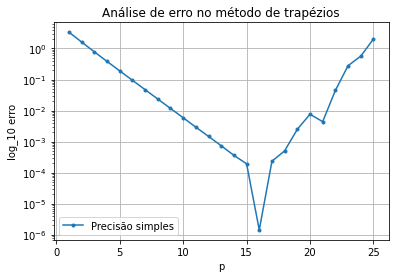

In [3]:
# Fazer gráfico
import matplotlib.pyplot as plt

plt.plot(df['p'], df['Erro'], marker='.', label='Precisão simples')

plt.title('Análise de erro no método de trapézios')
plt.xlabel('p')
plt.ylabel('log_10 erro')
plt.yscale('log')
plt.grid()
plt.legend()

plt.show()

In [4]:
# Repetir cálculos com dupla precisão
def trapezio2(f, N, a, b):
    reg = np.double(b-a)
    h = np.double(reg/N)
    
    # Lista de bases do trapézio
    lx = list(np.arange(a,b,h)+h)
    
    # Cálculo do método
    soma = np.double(f(lx.pop(0)))
    for x in lx:
        soma += np.double(2*f(x))
    
    T = np.double((h/2) * soma)
    return T

p = list(np.arange(1,26))
pd.set_option('precision', 16)
df2 = pd.DataFrame(index=np.arange(1,26), columns=['p', 'N', 'Inum', 'Erro'])

# Iterações
for p in p:
    N = np.double(2**p)
    a = np.double(0)
    b = np.double(1)
    I = np.double(6)
    Inum = np.double(trapezio2(func, N, 0, 1))
    erro = np.double(np.abs(Inum-I))
    df2.loc[p] = [p, N, Inum, erro]
df2

,p,N,Inum,Erro
1,1,2,2.671875,3.328125
2,2,4,4.39892578125,1.60107421875
3,3,8,5.224075317382812,0.7759246826171875
4,4,16,5.618494510650635,0.3815054893493652
5,5,32,5.810872629284859,0.1891273707151413
6,6,64,5.905843111220747,0.09415688877925277
7,7,128,5.953023275433225,0.04697672456677537
8,8,256,5.976537068725975,0.02346293127402532
9,9,512,5.98827489217372,0.01172510782627967
10,10,1024,5.994139035542959,0.005860964457040652


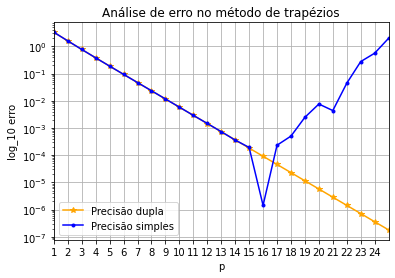

In [5]:
# Fazer gráfico
import matplotlib.pyplot as plt

plt.plot(df2['p'], df2['Erro'], marker='*', color='orange', label='Precisão dupla')
plt.plot(df['p'], df['Erro'], marker='.', color='blue', label='Precisão simples')

plt.title('Análise de erro no método de trapézios')
plt.xlabel('p')
plt.ylabel('log_10 erro')
plt.yscale('log')
plt.xlim(1,25)
plt.xticks(np.arange(1,25,1))
plt.legend()
plt.grid()

plt.show()

No gráfico acima, no caso de precisão simples, vemos que no ponto $p=16$ houve erro de truncamento, ou seja, erro de parada  abrupta do método. Isso é evidenciado pela queda brusca do erro, que teoricamente tem aspecto linear na forma $O(h^\alpha)$. Mas por que o erro aumenta depois? Isto acontece por causa do erro de roundoff, que é o "erro de arredondamento". Conforme o método vai arredondando as somas, ele vai acumulando um erro conforme $N$ aumenta, e por isso o erro vai aumentar. <br>
Uma vez que na precisão dupla temos mais casas decimais a serem calculadas, não temos o mesmo erro que na precisão simples até o $N$ considerado. Se continuarmos calculando para $p$ maiores, iremos eventualmente ver os mesmos erros na precisão dupla.

Podemos analisar o $\alpha$ do erro calculando o coeficiente angular do gráfico acima. Vamos pegar os pontos $(6,-1)$ e $(9,-2)$. Temos <br>
$\alpha = \frac{y_2 - y_1}{x_2 - x_1} = \frac{-2+1}{9-6} = -\frac{1}{3} \approx -0.3$

Que é a ordem de grandeza do erro do método.

**2) O período de um pêndulo simples para ângulos pequenos $(\theta_0<10º)$ é dado aproximadamente por $T_{Galileu}=2\pi\sqrt{l/g}$. Para ângulos apreciáveis e desprezando a resistência do ar, a expressão para o período é**

<center>
$T=4\sqrt{\frac{l}{g}} \int_{0}^{\pi/2} \frac{1}{\sqrt{1-k^2sin^2\xi}} d \xi$
</center>

**onde $k=sin(\theta_0/2)$ e $\theta_0$ é o ângulo inicial em *radianos*. Com o método de Simpson, calcule a integral acima e construa uma tabela com 10 valores de $\theta_0$ e $T$, com $\theta_0$ variando no intervalo $[0,\pi)$. Aumente bem o número de valores $\theta_0$ e faça um gráfico de $T/T_{Galileu}$ em função de $\theta_0$. Use o número de divisões trapezoidais que achar necessário.**

***===ENTREGAR PROGRAMA + TABELA + GRÁFICO===***

Primeiro, defino o algoritmo:

In [6]:
# Definir método
def simpson(f, t, N, a, b):
    '''f: Função; t: Theta_0 (específico para o problema), N: Nº de intervalos, (a,b): Região de integração'''
    if N%2 == 1:
        raise ValueError("Por favor, passe um N par.") # Se N ímpar, as listas quebram
    h = (b-a)/N # Tamanho do passo
    
    lx = np.linspace(a,b,N+1) # Lista de bases
    # Pares e ímpares
    lxp = lx[0:-1:2] 
    lxi = lx[1::2] 
    lxp2 = lx[2::2]
    
    # Cálculo do método
    soma = np.sum(f(lxp, t) + 4*f(lxi, t) + f(lxp2, t))
    R = (h/3) * soma
    return R

Agora, vou aplicar para aquela integral. Vou utilizar 10 valores diferentes de $\theta_0$, variando $10$ vezes no intervalo $[0, \pi)$.

In [7]:
# Definir função a integrar
def func(x, t_0):
    k = np.sin(t_0/2)
    return 1/(np.sqrt(1 - k**2 * np.sin(x)**2))

# Definir valores de theta_0 (lista de 0 a pi com 10 números)
lt0 = np.linspace(0, np.pi-1e-7, 10)

# Aplicar para cada theta_0
# Testando o método com algumas funções, vi que o método parece convergir rápido. Vou
# utilizar N = 1000. Também utilizarei g=10 e l=1 (genérico).
N = 1000
l = 1
g = 10
# Montar tabela
dt = pd.DataFrame(index=np.arange(1,10+1), columns=['teta', 'T'])
for t in range(len(lt0)):
    T = 4 * np.sqrt(l/g) * simpson(func, lt0[t], N, 0, np.pi/2)
    dt.iloc[t] = [lt0[t], T]

dt

,teta,T
1,0,1.986917653159221
2,0.3490658392877548,2.002155374910078
3,0.6981316785755096,2.049188679798712
4,1.047197517863264,2.132324265167292
5,1.396263357151019,2.260104027977238
6,1.745329196438774,2.448337907643403
7,2.094395035726529,2.72780043692918
8,2.443460875014284,3.168032979108033
9,2.792526714302038,3.988751583708901
10,3.141592553589793,13411.2184142981


Nota: Tomei a liberdade de escrever $\pi$ como $\pi-10^{-7}$, já que o valor $\pi$ iria mostrar $T = +\infty$. Isto se justifica uma vez que o intervalo $[0,\pi)$ é fechado em $\pi$.

Agora, vamos calcular para $10000$ valores de $\theta_0$ no intervalo $[0, \pi)$ considerado, e calcular $T/T_{galileu}$.

In [8]:
# Agora, vamos calcular para 10000 valores de teta no intervalo considerado, e calcular T/Tg

Tg = 2*np.pi* np.sqrt(l/g)
tetas = np.linspace(0,np.pi-1e-7,1000)
Tt = [(4 * np.sqrt(l/g) * simpson(func, t, N, 0, np.pi/2)) / Tg
      for t in tetas]

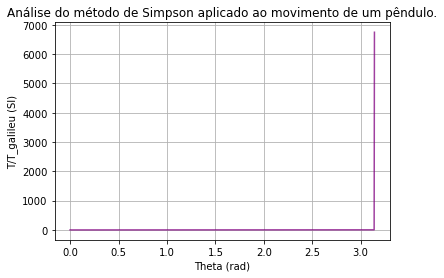

In [9]:
# Montar gráfico de T/Tg

plt.plot(tetas, Tt,
        alpha=0.75, color='purple')

plt.title('Análise do método de Simpson aplicado ao movimento de um pêndulo.')
plt.xlabel('Theta (rad)')
plt.ylabel('T/T_galileu (SI)')

plt.grid()
plt.show()

O gráfico acima parece sofrer uma diferença abrupta em $\theta_0\approx\pi$. Mas, ampliando o gráfico, visualizamos melhor a razão $T/T_{galileu}$.

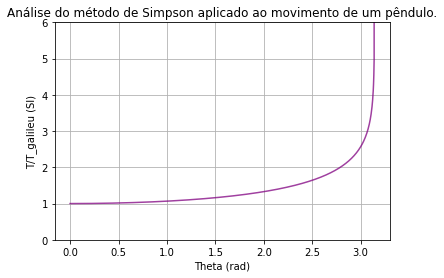

In [10]:
plt.plot(tetas, Tt,
        alpha=0.75, color='purple')

plt.title('Análise do método de Simpson aplicado ao movimento de um pêndulo.')
plt.xlabel('Theta (rad)')
plt.ylabel('T/T_galileu (SI)')
plt.ylim(0,6)

plt.grid()
plt.show()

Analisando o gráfico acima vemos que, como a teoria prevê, se $\theta_0 \rightarrow 0$, $T \rightarrow T_{galileu}$. Conforme $\theta_0$ cresce, o período tende a crescer e a razão $T/T_{galileu}$ aumenta. Imagino que, quando $\theta_0 \approx \pi$, nossa previsão teórica deixa de ser válida, e para explicar corretamente o período seria necessário considerar oscilações não-lineares e caóticas.

**3) Cálculo da área sob a curva $y=x^4$, $0<x<1$, usando o método de Monte-Carlo.**

**a) Construa primeiro uma rotina random($Z_i$) que retorne números aleatórios uniformemente distribuídos por "linear congruential generator" com $Z_{i+1}=(a Z_i+c) mod m$, onde $a=1103515245$, $c=12345$, $m=2147483647$ e $U_i=Z_{i+1}/m$. $U_i$ é o número entre 0 e 1 gerado. Use seu número USP como semente inicial $Z_0$.**

Farei uma rotina random na forma $Z_{i+1} = (a Z_i + c) \% m $, onde $a=1103515245$, $c=12345$, $m=2147483647$, e $U_i = Z_{i+1}/m$.

In [3]:
# Random generator
def random(a, b, m, z0):
    random = []
    idum = (a*z0+b)%m
    random.append(idum)
    while idum!=z0:
        idum = (a*idum+b)%m
        random.append(idum)
    return [z/m for z in random]

In [4]:
# Aplicação
a = 4
c = 1
m = 9
z0 = 3
random(a, c, m, z0)

[0.4444444444444444,
 0.8888888888888888,
 0.6666666666666666,
 0.7777777777777778,
 0.2222222222222222,
 0.0,
 0.1111111111111111,
 0.5555555555555556,
 0.3333333333333333]

***===ENTREGAR PROGRAMA===***

**b) Faça UMA tentativa jogando 100 pontos $(x,y)$, $0<x<1$ e $0<y<1$ aleatoriamente e determine o valor da área sob a curva usando**

<center>
    $I \approx\frac{número de pontos dentro}{número total de pontos}$
</center>

***===ENTREGAR PROGRAMA===***

**c) Faça um estudo com diferentes números de tentativas $N_t=2,4,8,16,...,131072$ (cada tentativa joga 100 pontos aleatórios). Construa a seguinte tabela**

![title](./table2.png)

**onde $I_m$ é o valor médio da integral, $\sigma$ é o desvio padrão e $\sigma_m$ é o desvio padrão da média, dados pelas fórmulas:**

<center>
$I_m = \frac{1}{N_t}\Sigma_{i=1}^{N_t} I_i$
</center>

<center>
$\sigma^2=\frac{1}{N_t-1}\Sigma_{i=1}^{N_t}(I_i-I_m)^2
$
</center>

**e $\sigma_m=\sigma/\sqrt{N_t}$.**

**O valor da integral é dado por $I_m \pm \sigma_m$.**

***===ENTREGAR TABELA===***